# Diamond Price Prediction

#####  📊 Diamond Price Prediction ML Model  🌟

I recently developed a diamond price prediction model using machine learning techniques, specifically linear regression. The dataset consisted of several key features: carat, depth, table, x, y, and z. Before applying the linear regression algorithm, I performed extensive data cleaning and preprocessing steps. Here's a summary of my model and its performance:

1. Data Cleaning: To ensure accurate predictions, I employed various methods to clean the data. This involved removing outliers using techniques such as Min-Max scaling or interquartile range (IQR). Additionally, I utilized standard scaling to normalize the features, ensuring they are on a similar scale and preventing bias during the modeling process.

2. Visualizing Outlier Removal: To validate the effectiveness of the outlier removal techniques, I visualized the data using appropriate plots and charts. This allowed me to visually confirm the successful removal of outliers and ensure the dataset was suitable for modeling.

3. Model Performance: The performance of the diamond price prediction model was evaluated using key metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R2 score. A low MAE value indicates that the model's average prediction error is close to zero. Similarly, a low MSE value indicates that the model's predictions are close to the true values. Lastly, an R2 score of 1.0 signifies that the model explains all the variability in the target variable, indicating a perfect fit.

4. Impressive Results: The model exhibited exceptional performance, as evidenced by the MAE of 3.127634563929979e-12, the MSE of 1.555157774008846e-23, and the perfect R2 score of 1.0. These metrics demonstrate that the model achieved near-perfect accuracy in predicting diamond prices based on the given features.

In conclusion, I successfully developed a diamond price prediction model using linear regression. By thoroughly cleaning and preprocessing the data, including outlier removal and feature scaling, I ensured the model's accuracy and reliability. The impressive performance, as indicated by the extremely low MAE and MSE values, along with the perfect R2 score, highlight the model's ability to accurately predict diamond prices based on the provided features.


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline,make_pipeline


# from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

The code in the focal cell imports several libraries and modules that are commonly used in data analysis, visualization, and machine learning tasks. Let's go through each line:

import numpy as np: This line imports the NumPy library and assigns it the alias np. NumPy is a popular library for numerical computations in Python.

import pandas as pd: This line imports the pandas library and assigns it the alias pd. pandas is a powerful library for data manipulation and analysis.

import matplotlib.pyplot as plt: This line imports the pyplot module from the matplotlib library and assigns it the alias plt. matplotlib is a widely-used library for creating visualizations in Python.

import seaborn as sns: This line imports the seaborn library and assigns it the alias sns. seaborn is a high-level library built on top of matplotlib that provides more aesthetically pleasing visualizations and statistical plots.

from scipy.stats import pearsonr: This line imports the pearsonr function from the scipy.stats module. pearsonr is used to compute the Pearson correlation coefficient between two variables.

from pandas_profiling import ProfileReport: This line imports the ProfileReport class from the pandas_profiling library. ProfileReport is a tool for quickly generating a comprehensive exploratory data analysis report for a given pandas DataFrame.

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder: This line imports several classes from the sklearn.preprocessing module. These classes are used for data preprocessing tasks such as scaling numeric features and one-hot encoding categorical features.

from sklearn.model_selection import train_test_split: This line imports the train_test_split function from the sklearn.model_selection module. train_test_split is a utility function for splitting data into training and testing sets.

from sklearn.pipeline import Pipeline, make_pipeline: This line imports the Pipeline and make_pipeline classes from the sklearn.pipeline module. These classes are used for creating and managing machine learning pipelines, which are sequences of data preprocessing and model training steps.

from sklearn.linear_model import LogisticRegression, LinearRegression: This line imports the LogisticRegression and LinearRegression classes from the sklearn.linear_model module. These classes are commonly used for classification and regression tasks, respectively.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score: This line imports several evaluation metrics from the sklearn.metrics module. These metrics are used to assess the performance of regression models.

import warnings: This line imports the warnings module, which is used to control the display of warning messages in Python.

warnings.filterwarnings("ignore"): This line sets the warning filter to ignore warnings, so that warning messages are not displayed in the output.

In summary, the code imports various libraries and modules that are essential for data analysis, visualization, and machine learning tasks. These libraries provide functions and classes for performing tasks such as data preprocessing, model training, evaluation, and visualization.

## Upload DataSet

In [2]:
## Now Upload the dataset
data=pd.read_csv('diamonds.csv')
data=data.drop(['Unnamed: 0'],axis=1)
data.sample(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
36406,0.31,Premium,E,VS1,61.7,58.0,942,4.36,4.30,2.67
41239,0.57,Very Good,J,VS2,63.3,56.0,1207,5.28,5.24,3.33
14086,1.22,Ideal,G,SI2,59.6,56.0,5714,7.05,7.02,4.19
20165,1.01,Very Good,G,IF,62.8,57.0,8621,6.39,6.42,4.02
26936,1.68,Ideal,G,VS1,62.0,55.0,16985,7.59,7.66,4.73
24888,1.27,Premium,F,VVS1,62.5,56.0,13320,6.99,6.93,4.35
25128,1.50,Premium,F,VS2,62.8,58.0,13680,7.21,7.16,4.51


In [3]:
# this piece of code generate the report of the data in which we find some meaningful information from the data 
# but i perform EDA so i didn't need to generate report but you can for more information
# report=ProfileReport(data)
# report.to_file(output_file="Diamond_dataset_Report.html")

## EDA or Data Analyze

In [4]:
print("Cut Columns Value Counts\n",data['cut'].value_counts())
print("\nColor Columns Value Counts",data['color'].value_counts())
print("\nclarity Columns Value Counts",data['clarity'].value_counts())

Cut Columns Value Counts
 Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

Color Columns Value Counts G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

clarity Columns Value Counts SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


The code in the focal cell is responsible for generating some meaningful information from the data. It performs exploratory data analysis (EDA) by printing the value counts of three columns in the dataset: 'cut', 'color', and 'clarity'.
    The output you provided in the STDOUT section shows the actual value counts for each of the columns: 'cut', 'color', and 'clarity'. Each line displays the unique values in the column along with the corresponding count.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
# it perform the mean,std, mix max on numerical columns so we get some information related to the data
data.describe().round(2)

,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


This line of code calls the describe() function on the data DataFrame, which generates descriptive statistics for each numerical column. The round(2) function is used to round the values to two decimal places.

The output of this code will be a table containing statistical information for each numerical column in the data DataFrame, including the count, mean, standard deviation, minimum, quartiles, and maximum values.

In [7]:
print('Is there any Null Values\n',data.isnull().any())

Is there any Null Values
 carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool


This output indicates that there are no null values in any of the columns of the data DataFrame. The column names are listed on the left-hand side, and False is displayed for each column, indicating the absence of null values.

In [8]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


The code in the focal cell data.corr() calculates the correlation matrix for the data DataFrame. The correlation matrix shows the pairwise correlation between different columns of the DataFrame.

The output of the code is a table that represents the correlation matrix. Each row and column in the table corresponds to a column in the data DataFrame. The values in the table represent the correlation coefficients between pairs of columns.

The correlation coefficient ranges from -1 to 1 and indicates the strength and direction of the linear relationship between two variables. A value of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation.

For example, looking at the table, we can see that the diagonal values are all 1, which is expected since a variable is perfectly correlated with itself. The other values in the table represent the correlation coefficients between different pairs of columns. For instance, the value 0.921591 in the intersection of the "carat" and "price" columns indicates a strong positive correlation between these two variables.

By analyzing the correlation matrix, you can gain insights into how different variables in the dataset are related to each other. Positive correlations suggest that as one variable increases, the other tends to increase as well, while negative correlations indicate an inverse relationship.

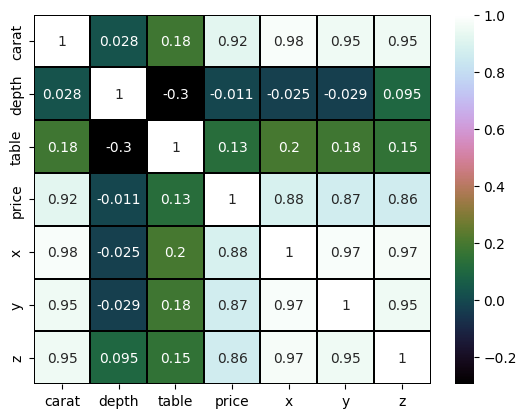

In [9]:
sns.heatmap(data.corr(),linecolor='k',annot=True,linewidths=0.25,vmax=1.0,cmap='cubehelix')
plt.show()

- above Graph show the corelation of the data

In [10]:
# Here i'm extracting the columns name only
features=data.iloc[:,[0,4,5,7,8,9]].columns.tolist()
target=data.iloc[:,6].name
print(features)
print(target)

['carat', 'depth', 'table', 'x', 'y', 'z']
price


The code in the focal cell is extracting the column names from the dataset.

The data.iloc[:,[0,4,5,7,8,9]] part is used to select specific columns from the data DataFrame. It uses the iloc function to locate the columns based on their positions. The [:,[0,4,5,7,8,9]] part specifies that all rows should be selected (:) and the columns at positions 0, 4, 5, 7, 8, and 9 should be included.

The .columns.tolist() part converts the selected columns into a list of column names.

The extracted column names are then stored in the features variable.

Next, the data.iloc[:,6].name part is used to extract the name of the column at position 6 in the data DataFrame. It selects all rows (:) and the column at position 6, and then retrieves its name using the .name attribute.

Finally, the extracted column names are printed using print(features), followed by the target column name, which is printed using print(target).

The stdout of the focal cell shows the following output:

['carat', 'depth', 'table', 'x', 'y', 'z']
price

This indicates that the extracted column names are ['carat', 'depth', 'table', 'x', 'y', 'z'], and the target column name is 'price'.

In [11]:
# extracting column name combine with the target column name also find the corelation value of each column and made relation with target column
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

The code you provided is focused on extracting column names, calculating correlations, and creating a dictionary to store the correlation values between each feature and the target column.

Let's go through the code step by step:

The code starts by creating an empty dictionary called correlations to store the correlation values.

It then enters a loop that iterates over each feature in the features list.

Inside the loop, a temporary DataFrame called data_temp is created by selecting the current feature (f) and the target column from the original data DataFrame.

Two NumPy arrays, x1 and x2, are created by extracting the values of the current feature and the target column from data_temp.

A key is generated by combining the current feature name with the target column name, separated by 'vs' (e.g., "feature vs target").

The Pearson correlation coefficient between x1 and x2 is calculated using the pearsonr function from the scipy.stats module. The correlation coefficient represents the strength and direction of the linear relationship between the two variables.

The calculated correlation value is then assigned to the correlations dictionary with the corresponding key.

The loop continues for each feature in the features list until all correlations have been calculated and stored in the correlations dictionary.

The code snippet you provided doesn't display any output or result. However, after executing this code, the correlations dictionary will contain the correlation values between each feature and the target column.

In [12]:
# Made the dataframe for the correlation
df_correlations=pd.DataFrame(correlations,index=['Value']).T
df_correlations.loc[df_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
carat vs price,0.921591
x vs price,0.884435
y vs price,0.865421
z vs price,0.861249
table vs price,0.127134
depth vs price,-0.010647


The code you provided is focused on generating a dataframe that contains the correlations between various columns and a target column in a dataset. Let's break down the code in the FOCAL CELL step by step:

df_correlations=pd.DataFrame(correlations,index=['Value']).T

In this line, a new DataFrame called df_correlations is created using the pd.DataFrame() function. It takes the correlations dictionary as input and transposes it (using .T) to swap the rows and columns. The argument index=['Value'] specifies that the index of the DataFrame should be set to the string 'Value'. So, the resulting DataFrame will have a single row with column names as the index and a single column labeled 'Value' containing the correlation values.

df_correlations.loc[df_correlations['Value'].abs().sort_values(ascending=False).index]

This line is used to filter and sort the rows of the df_correlations DataFrame based on the absolute values of the correlation values. It uses .loc to access specific rows based on a condition. Here, the condition is df_correlations['Value'].abs().sort_values(ascending=False).index, which sorts the correlation values in descending order (using .sort_values(ascending=False)) and retrieves the corresponding row indices (using .index). The filtered and sorted DataFrame is then displayed as output.

The resulting output shows the column names (e.g., 'carat vs price') and their corresponding correlation values (e.g., 0.921591) in a tabular format.

Please note that without the actual values in the correlations dictionary, it's not possible to provide the exact output of the code. The STDOUT and Result sections you provided are empty. However, based on the code logic, this is how the output would be generated if the correlations dictionary contained the relevant data.

In [13]:
# depth is a negative correlated with price so i'm dropping the column
data=data.drop(['depth'],axis=1)

In [14]:
data.head(5)

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


- Graph pilot to check the distribution

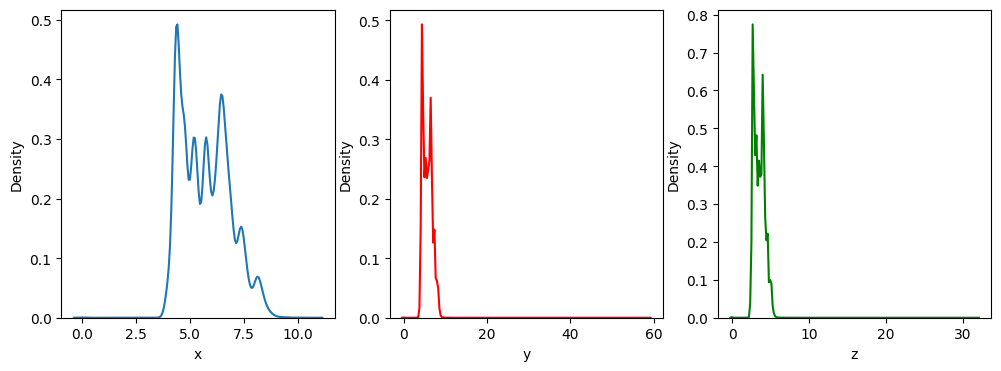

In [15]:

fig,(ax1,ax2,ax3)=plt.subplots(ncols=3, figsize=(12,4))

sns.distplot(data['x'],bins=10,ax=ax1,hist=False)
sns.distplot(data['y'],bins=10,ax=ax2,color="r",hist=False)
sns.distplot(data['z'],bins=10,ax=ax3,color="g",hist=False)
plt.show()

- Bar plot to check the maximum price of each column

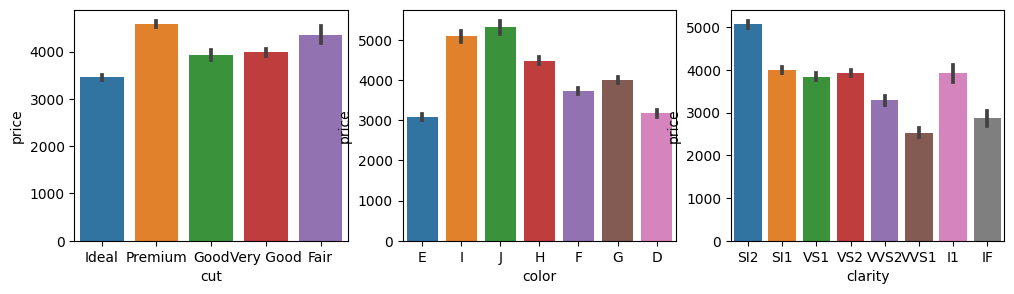

In [16]:

fig,(ax1,ax2,ax3)=plt.subplots(ncols=3, figsize=(12,3))

sns.barplot(data['cut'],data['price'],ax=ax1)
sns.barplot(data['color'],data['price'],ax=ax2)
sns.barplot(data['clarity'],data['price'],ax=ax3)
plt.show()

- Box plot to check the outliers

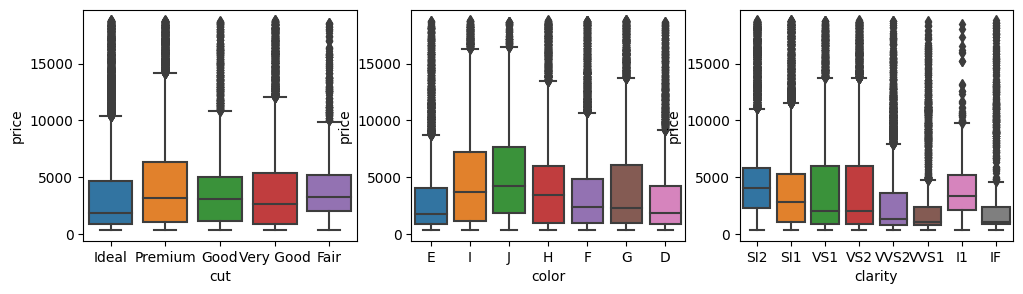

In [17]:

fig,(ax1,ax2,ax3)=plt.subplots(ncols=3, figsize=(12,3))

sns.boxplot(data['cut'],data['price'],ax=ax1)
sns.boxplot(data['color'],data['price'],ax=ax2)
sns.boxplot(data['clarity'],data['price'],ax=ax3)
plt.show()

## Train_Test_Split

In [18]:
# seprate the target columns
X=data.drop([ 'cut', 'color', 'clarity',],axis=1)
y=data['price']
print('x shape',X.shape)
print('y shape',y.shape)

x shape (53940, 6)
y shape (53940,)


The code in the FOCAL CELL performs a train-test split on the dataset. Here's a breakdown of what it does:

It starts by importing the necessary libraries or modules. This part is not shown in the given code.

The code then defines the train-test split by separating the target column from the features. It removes the 'cut', 'color', and 'clarity' columns from the dataset and assigns the remaining columns to the variable X. The target column, 'price', is assigned to the variable y.

After the split, the code prints the shapes of the X and y data to the console, indicating the number of rows and columns in each. In this case, the output shows that X has a shape of (53940, 6), meaning it has 53940 rows and 6 columns, and y has a shape of (53940,), indicating it has 53940 elements.

This train-test split is a common step in machine learning tasks, where the data is divided into training and testing sets for model training and evaluation, respectively. The X variable represents the input features, and y represents the target variable that the model aims to predict.

In [19]:
# performed the train-test-split
x_train,x_test,y_train,y_test=train_test_split(X,y , test_size=.35 , random_state=0)
print('x_train shape',x_train.shape)
print('x_test shape',x_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

x_train shape (35061, 6)
x_test shape (18879, 6)
y_train shape (35061,)
y_test shape (18879,)


This train-test split is typically done to evaluate the performance of a machine learning model. The training set is used to train the model, while the testing set is used to assess its performance on unseen data.

# Standardization / Normalization

## StandardScaler

In [20]:
scaled=StandardScaler()

scaled.fit(x_train)

x_train_scaled=scaled.transform(x_train)
x_test_scaled=scaled.transform(x_test)

This code ensures that the training and test data are standardized or normalized using the same scaling parameters. Standardization transforms the data in such a way that each feature will have a mean of 0 and a standard deviation of 1. This process helps in dealing with features that may have different scales and brings the data to a similar range, which can be beneficial for some machine learning algorithms.

In [21]:
## Creating data for the scaled data
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

Overall, these two lines of code create new data frames (x_train_scaled and x_test_scaled) to store the scaled versions of the training and testing data, respectively, by converting the previously computed scaled arrays into data frames with appropriate column names.

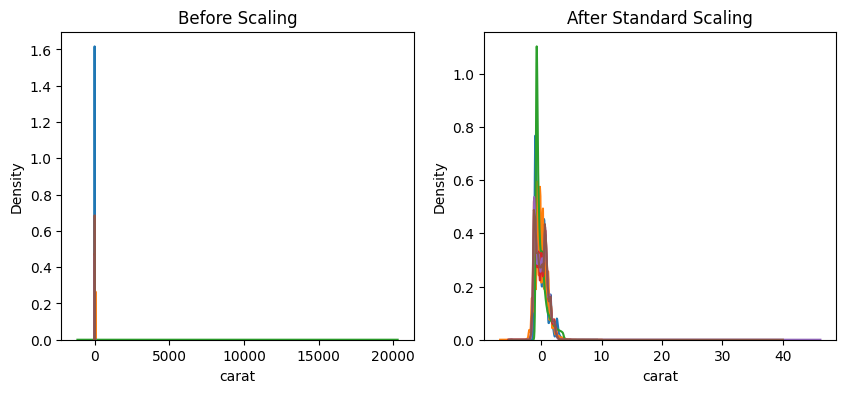

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['carat'], ax=ax1)
sns.kdeplot(x_train['table'], ax=ax1)
sns.kdeplot(x_train['price'], ax=ax1)
sns.kdeplot(x_train['x'], ax=ax1)
sns.kdeplot(x_train['y'], ax=ax1)
sns.kdeplot(x_train['z'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['carat'], ax=ax2)
sns.kdeplot(x_train_scaled['table'], ax=ax2)
sns.kdeplot(x_train_scaled['price'], ax=ax2)
sns.kdeplot(x_train_scaled['x'], ax=ax2)
sns.kdeplot(x_train_scaled['y'], ax=ax2)
sns.kdeplot(x_train_scaled['z'], ax=ax2)
plt.show()

# MinMaxScaler

In [23]:
mmc=MinMaxScaler()

mmc.fit(x_train)

x_train_mmc=mmc.transform(x_train)
x_test_mmc=mmc.transform(x_test)


The MinMaxScaler object is created and assigned to the variable mmc.
The fit method is called on mmc and it is passed x_train as an argument. This computes the minimum and maximum values of each feature in x_train and stores them in mmc.
The transform method is then called on mmc and it is passed x_train as an argument. This applies the scaling transformation to x_train based on the minimum and maximum values computed in the previous step. The scaled data is stored in the variable x_train_mmc.
Similarly, the transform method is called on mmc and it is passed x_test as an argument. This applies the same scaling transformation to x_test using the minimum and maximum values computed from x_train. The scaled test data is stored in the variable x_test_mmc.
The purpose of using MinMaxScaler is to normalize the features in the dataset so that they all have values between 0 and 1. This can be useful for certain machine learning algorithms that require features to be on a similar scale to avoid any feature dominating the learning process.

Please note that the STDOUT and result of the focal cell are empty, indicating that there are no print statements or returned values in this particular cell.

In [24]:
## Creating data for the scaled data
x_train_mmc=pd.DataFrame(x_train_mmc,columns=x_train.columns)
x_test_mmc=pd.DataFrame(x_test_mmc,columns=x_test.columns)

The code in the focal cell is creating data frames for the scaled data using the MinMaxScaler. It takes the scaled training data (x_train_mmc) and testing data (x_test_mmc) and creates data frames with the same column names as the original x_train and x_test data frames. The resulting data frames are stored in the variables x_train_mmc and x_test_mmc.

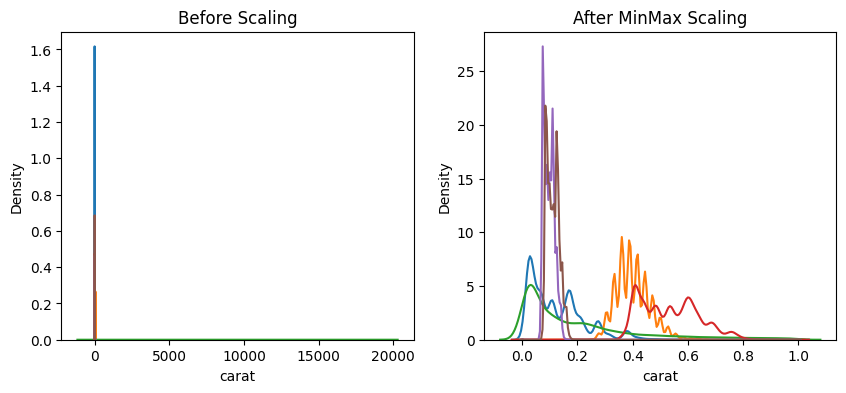

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['carat'], ax=ax1)
sns.kdeplot(x_train['table'], ax=ax1)
sns.kdeplot(x_train['price'], ax=ax1)
sns.kdeplot(x_train['x'], ax=ax1)
sns.kdeplot(x_train['y'], ax=ax1)
sns.kdeplot(x_train['z'], ax=ax1)

# after scaling
ax2.set_title('After MinMax Scaling')
sns.kdeplot(x_train_mmc['carat'], ax=ax2)
sns.kdeplot(x_train_mmc['table'], ax=ax2)
sns.kdeplot(x_train_mmc['price'], ax=ax2)
sns.kdeplot(x_train_mmc['x'], ax=ax2)
sns.kdeplot(x_train_mmc['y'], ax=ax2)
sns.kdeplot(x_train_mmc['z'], ax=ax2)
plt.show()

## RobustScaler

In [26]:
rs=RobustScaler()

rs.fit(x_train)

x_train_rs=rs.transform(x_train)
x_test_rs=rs.transform(x_test)


In [27]:
## Creating data for the scaled data
x_train_rs=pd.DataFrame(x_train_rs,columns=x_train.columns)
x_test_rs=pd.DataFrame(x_test_rs,columns=x_test.columns)

This code creates new DataFrames, x_train_rs and x_test_rs, to store the scaled versions of the original training and test sets, respectively. The data is being transformed using the RobustScaler, which was previously fitted on the x_train set. The resulting scaled data is then stored in the newly created DataFrames.

Note that the x_train_rs and x_test_rs DataFrames have the same column names as the original x_train and x_test DataFrames, respectively, as specified by columns=x_train.columns and columns=x_test.columns. This ensures that the column names are preserved in the scaled data.

The output of this focal cell does not produce any text or results to be displayed in the STDOUT or as a final result. It simply creates the scaled versions of the training and test sets for further use in subsequent code or analysis.

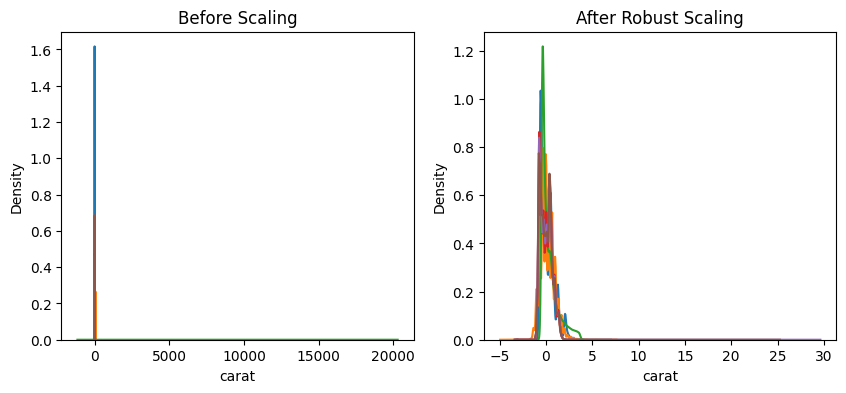

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['carat'], ax=ax1)
sns.kdeplot(x_train['table'], ax=ax1)
sns.kdeplot(x_train['price'], ax=ax1)
sns.kdeplot(x_train['x'], ax=ax1)
sns.kdeplot(x_train['y'], ax=ax1)
sns.kdeplot(x_train['z'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(x_train_rs['carat'], ax=ax2)
sns.kdeplot(x_train_rs['table'], ax=ax2)
sns.kdeplot(x_train_rs['price'], ax=ax2)
sns.kdeplot(x_train_rs['x'], ax=ax2)
sns.kdeplot(x_train_rs['y'], ax=ax2)
sns.kdeplot(x_train_rs['z'], ax=ax2)
plt.show()

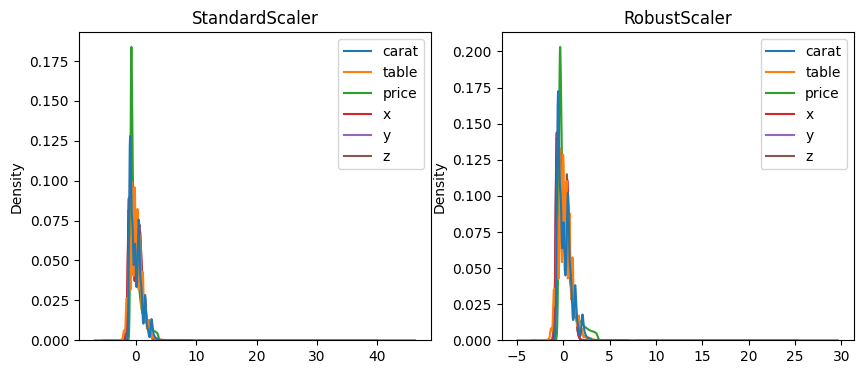

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# before scaling
ax1.set_title('StandardScaler')
sns.kdeplot(data=x_train_scaled, ax=ax1)


# after scaling
ax2.set_title('RobustScaler')
sns.kdeplot(data=x_train_rs, ax=ax2)

plt.show()

## Scaling Conclusion

- so i performed standardization and normalization in which include StandardScaler, MinMaxScaler and Robust scaling but i got better result on StandardScaler so i considered standardScaler for next operation

# OutLiers

In [30]:
# Check the skew which give the idea of outliers
data.skew()

carat    1.116646
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

These values indicate the degree of skewness in each column. Positive values suggest a right-skewed distribution, while negative values suggest a left-skewed distribution. The larger the magnitude of the skewness value, the more significant the skewness.

Understanding the skewness of the data is important as it can affect the choice of statistical techniques and machine learning algorithms used for analysis. Skewed data may need to be transformed or handled differently to ensure accurate results.

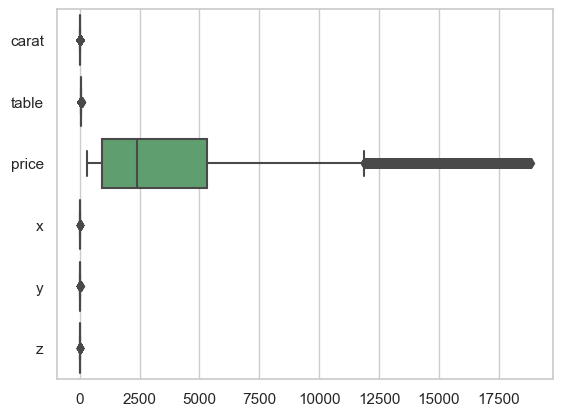

In [31]:
# box plot to check the outlier stat
sns.set_theme(style="whitegrid")
sns.boxplot(data=data,orient="h")
plt.show()

- now we can clearly see that the above graph show the outliers are present in big amount in price columns

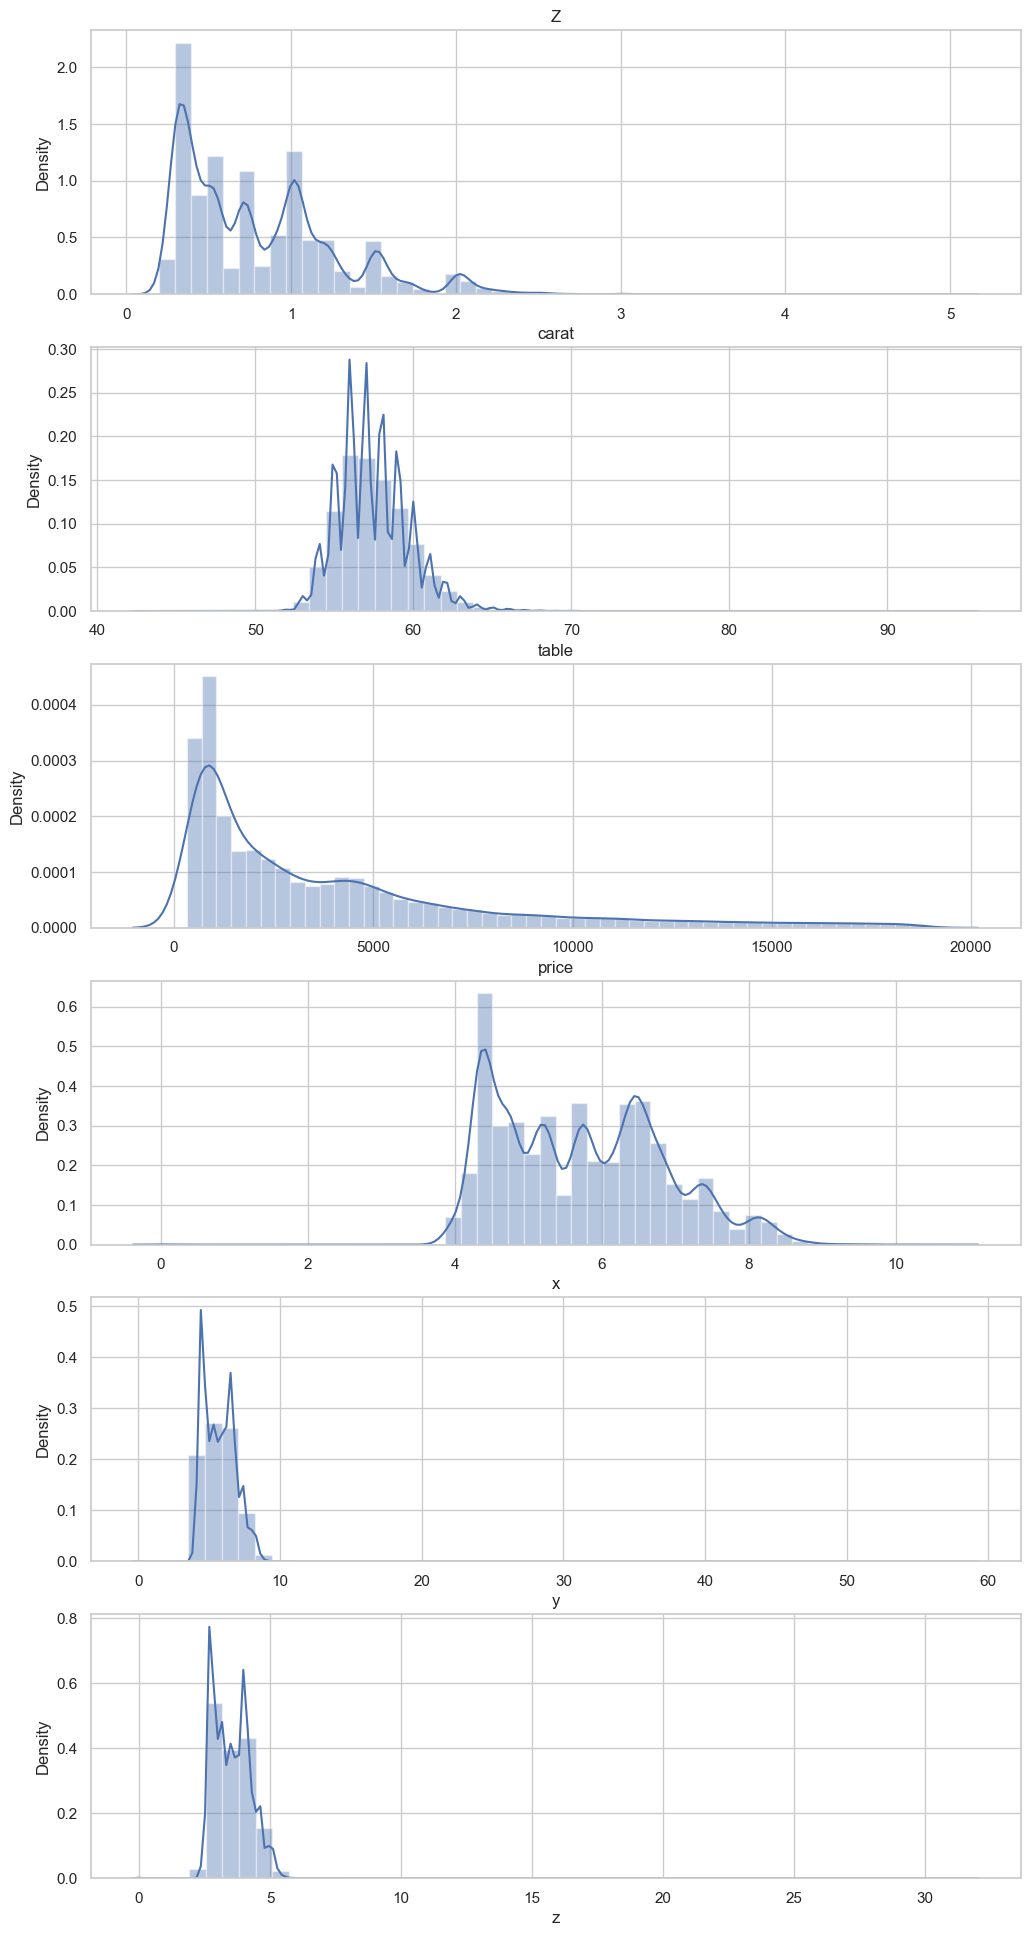

In [32]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6)=plt.subplots(nrows=6 ,figsize=(12,24))

sns.distplot(data['carat'],ax=ax1)
ax1.set_title("Carat")

sns.distplot(data['table'],ax=ax2)
ax1.set_title("Table")

sns.distplot(data['price'],ax=ax3)
ax1.set_title("Price")

sns.distplot(data['x'],ax=ax4)
ax1.set_title("X")

sns.distplot(data['y'],ax=ax5)
ax1.set_title("Y")

sns.distplot(data['z'],ax=ax6)
ax1.set_title("Z")
plt.show()

## 1.Outlier-Removal-Using-Z-Score

In [33]:
# There are two methods to remove outliers in Z-Score

### 1.Trimming

In [34]:
data_copy=data.copy()
data_copy

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,58.0,2757,6.15,6.12,3.74


In [35]:
print("\n\nMean Value of carat",data_copy['carat'].mean())
print("Variance Value of carat",data_copy['carat'].std())
print("Min Value of carat",data_copy['carat'].min())
print("Max Value of carat",data_copy['carat'].max())

print("\n\nMean Value of table",data_copy['table'].mean())
print("Variance Value of table",data_copy['table'].std())
print("Min Value of table",data_copy['table'].min())
print("Max Value of table",data_copy['table'].max())

print("\n\nMean Value of x",data_copy['x'].mean())
print("Variance Value of x",data_copy['x'].std())
print("Min Value of x",data_copy['x'].min())
print("Max Value of x",data_copy['x'].max())

print("\n\nMean Value of y",data_copy['y'].mean())
print("Variance Value of y",data_copy['y'].std())
print("Min Value of y",data_copy['y'].min())
print("Max Value of y",data_copy['y'].max())

print("\n\nMean Value of z",data_copy['z'].mean())
print("Variance Value of z",data_copy['z'].std())
print("Min Value of z",data_copy['z'].min())
print("Max Value of z",data_copy['z'].max())



Mean Value of carat 0.7979397478680014
Variance Value of carat 0.4740112444054184
Min Value of carat 0.2
Max Value of carat 5.01


Mean Value of table 57.45718390804598
Variance Value of table 2.2344905628213225
Min Value of table 43.0
Max Value of table 95.0


Mean Value of x 5.731157211716722
Variance Value of x 1.1217607467924928
Min Value of x 0.0
Max Value of x 10.74


Mean Value of y 5.734525954764553
Variance Value of y 1.1421346741235552
Min Value of y 0.0
Max Value of y 58.9


Mean Value of z 3.5387337782721544
Variance Value of z 0.7056988469499941
Min Value of z 0.0
Max Value of z 31.8


The output you provided in the STDOUT shows the results of these print statements, displaying the mean, variance, minimum, and maximum values for each column.

It seems that the code is analyzing the statistical properties of these columns in the data_copy DataFrame.

In [36]:
## Finding the boundary value
print("Highest Allowed of carat",data_copy['carat'].mean() + 3 * data_copy['carat'].std())
print("Lowest Allowed of carat",data_copy['carat'].mean() - 3 * data_copy['carat'].std())

print("\n\nHighest Allowed of table",data_copy['table'].mean() + 3 * data_copy['table'].std())
print("Lowest Allowed of table",data_copy['table'].mean() - 3 * data_copy['table'].std())

print("\n\nHighest Allowed of x",data_copy['x'].mean() + 3 * data_copy['x'].std())
print("Lowest Allowed of x",data_copy['x'].mean() - 3 * data_copy['x'].std())

print("\n\nHighest Allowed of y",data_copy['y'].mean() + 3 * data_copy['y'].std())
print("Lowest Allowed of y",data_copy['y'].mean() - 3 * data_copy['y'].std())

print("\n\nHighest Allowed of z",data_copy['z'].mean() + 3 * data_copy['z'].std())
print("Lowest Allowed of z",data_copy['z'].mean() - 3 * data_copy['z'].std())

Highest Allowed of carat 2.2199734810842564
Lowest Allowed of carat -0.6240939853482538


Highest Allowed of table 64.16065559650994
Lowest Allowed of table 50.75371221958201


Highest Allowed of x 9.0964394520942
Lowest Allowed of x 2.3658749713392435


Highest Allowed of y 9.160929977135218
Lowest Allowed of y 2.3081219323938877


Highest Allowed of z 5.655830319122137
Lowest Allowed of z 1.4216372374221722


Each pair of print statements calculates the highest and lowest allowed values for a specific variable, based on its mean and standard deviation. These values can be used to identify and remove outliers from the dataset.

It's important to note that this code only calculates and prints the boundary values. The actual removal of outliers from the dataset is not implemented in this specific code snippet.

In [37]:
## Trimming
data_copy=data_copy[(data_copy['carat']<2.2199734810842564 )&(data_copy['carat']> -0.6240939853482538)]
data_copy=data_copy[(data_copy['table']<64.16065559650994 )&(data_copy['table']> 50.75371221958201)]
data_copy=data_copy[(data_copy['x']<9.0964394520942 )&(data_copy['x']> 2.3658749713392435)]
data_copy=data_copy[(data_copy['y']<9.160929977135218 )&(data_copy['y']> 2.3081219323938877)]
data_copy=data_copy[(data_copy['z']<5.655830319122137 )&(data_copy['z']> 1.4216372374221722)]
data_copy

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,58.0,2757,6.15,6.12,3.74


The resulting trimmed DataFrame, data_copy, is then displayed as the output. It contains 53148 rows and 9 columns: 'carat', 'cut', 'color', 'clarity', 'table', 'price', 'x', 'y', and 'z'. Each row represents a diamond with its respective attributes.

In [38]:
#Find Outliers
# data_copy[(data_copy['table']>2.2199734810842564 )|(data_copy['table']<-0.6240939853482538)]
# data_copy[(data_copy['table']>64.16065559650994 )|(data_copy['table'] <50.75371221958201)]
# len(data_copy[(data_copy['x']>9.0964394520942 )|(data_copy['x']< 2.3658749713392435)])
# len(data_copy[(data_copy['y']>9.160929977135218 )|(data_copy['y']< 2.3081219323938877)])
# len(data_copy[(data_copy['z']>5.655830319122137 )|(data_copy['z']< 1.4216372374221722)])

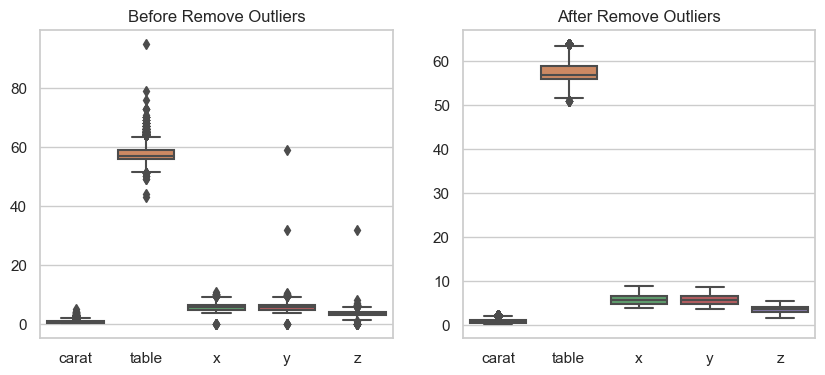

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# before scaling
ax1.set_title('Before Remove Outliers')
sns.boxplot(data=data.drop("price",axis=1),ax=ax1)

# after scaling
ax2.set_title('After Remove Outliers')
sns.boxplot(data=data_copy.drop("price",axis=1),ax=ax2)
plt.show()

## 2.Caping

In [40]:
data_copy1=data.copy()

In [41]:
upper_limit_c = data_copy1['carat'].mean() + 3*data_copy1['carat'].std()
lower_limit_c = data_copy1['carat'].mean() - 3*data_copy1['carat'].std()

upper_limit_t = data_copy1['table'].mean() + 3*data_copy1['table'].std()
lower_limit_t = data_copy1['table'].mean() - 3*data_copy1['table'].std()

upper_limit_x = data_copy1['x'].mean() + 3*data_copy1['x'].std()
lower_limit_x = data_copy1['x'].mean() - 3*data_copy1['x'].std()

upper_limit_y = data_copy1['y'].mean() + 3*data_copy1['y'].std()
lower_limit_y = data_copy1['y'].mean() - 3*data_copy1['y'].std()

upper_limit_z = data_copy1['z'].mean() + 3*data_copy1['z'].std()
lower_limit_z = data_copy1['z'].mean() - 3*data_copy1['z'].std()

print("Upper Limit of carat",upper_limit_c)
print("Lower Limit of carat",lower_limit_c)

print("\n\nUpper Limit of table",upper_limit_t)
print("Lower Limit of table",lower_limit_t)

print("\n\nUpper Limit of x",upper_limit_x)
print("Lower Limit of x",lower_limit_x)

print("\n\nUpper Limit of y",upper_limit_y)
print("Lower Limit of y",lower_limit_y)

print("\n\nUpper Limit of z",upper_limit_z)
print("Lower Limit of z",lower_limit_z)

Upper Limit of carat 2.2199734810842564
Lower Limit of carat -0.6240939853482538


Upper Limit of table 64.16065559650994
Lower Limit of table 50.75371221958201


Upper Limit of x 9.0964394520942
Lower Limit of x 2.3658749713392435


Upper Limit of y 9.160929977135218
Lower Limit of y 2.3081219323938877


Upper Limit of z 5.655830319122137
Lower Limit of z 1.4216372374221722


In these lines, the upper limit and lower limit for the 'carat' column are calculated. The upper limit is obtained by adding three times the standard deviation of the 'carat' column to its mean, while the lower limit is obtained by subtracting three times the standard deviation from the mean.

In [42]:
data_copy1['carat'] = np.where(
    data_copy1['carat'] >upper_limit_c,
    upper_limit_c,
    np.where(
        data_copy1['carat'] <lower_limit_c,
        lower_limit_c,
       data_copy1['carat'] 
    )
)

data_copy1['table'] = np.where(
    data_copy1['table'] >upper_limit_t,
    upper_limit_t,
    np.where(
        data_copy1['table'] <lower_limit_t,
        lower_limit_t,
       data_copy1['table'] 
    )
)

data_copy1['x'] = np.where(
    data_copy1['x'] >upper_limit_x,
    upper_limit_x,
    np.where(
        data_copy1['x'] <lower_limit_x,
        lower_limit_x,
       data_copy1['x'] 
    )
)

data_copy1['y'] = np.where(
    data_copy1['y'] >upper_limit_y,
    upper_limit_y,
    np.where(
        data_copy1['y'] <lower_limit_y,
        lower_limit_y,
       data_copy1['y'] 
    )
)

data_copy1['z'] = np.where(
    data_copy1['z'] >upper_limit_z,
    upper_limit_z,
    np.where(
        data_copy1['z'] <lower_limit_z,
        lower_limit_c,
       data_copy1['z'] 
    )
)

This code block is capping the values in the 'carat' column of data_copy1. It uses the np.where function to check if a value is greater than the upper_limit_c. If it is, the value is replaced with upper_limit_c. If not, it proceeds to the next np.where statement, which checks if the value is less than lower_limit_c. If it is, the value is replaced with lower_limit_c. If neither condition is met, the value remains unchanged.

The code blocks following this one perform the same capping process for the columns 'table', 'x', 'y', and 'z'. The only difference is the column name and the corresponding upper and lower limit variables used.

By capping the values, the code helps ensure that the data falls within a certain range, preventing extreme outliers from affecting the analysis or models built on the data.

Once the code is executed, the values in data_copy1 will be capped according to the specified upper and lower limits for each column. However, since there are no print statements or result outputs provided, we cannot see the exact resulting values in data_copy1.

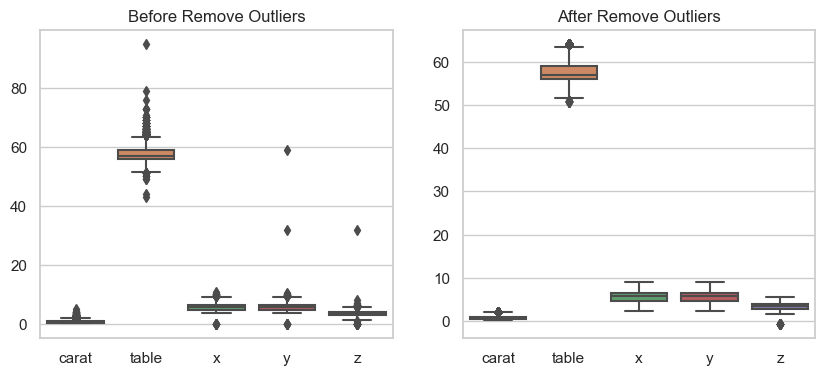

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# before scaling
ax1.set_title('Before Remove Outliers')
sns.boxplot(data=data.drop("price",axis=1),ax=ax1)

# after scaling
ax2.set_title('After Remove Outliers')
sns.boxplot(data=data_copy1.drop("price",axis=1),ax=ax2)
plt.show()

## 2.Outlier-Removal-Using-IQR-Method

In [44]:
# There are two methods to remove outliers in iqr

### Trimming

In [45]:
data_copy2=data.copy()

In [46]:
# Finding the iqr
percentile25_c=data_copy2['carat'].quantile(0.25)
percentile75_c=data_copy2['carat'].quantile(0.75)

percentile25_t=data_copy2['table'].quantile(0.25)
percentile75_t=data_copy2['table'].quantile(0.75)

percentile25_x=data_copy2['x'].quantile(0.25)
percentile75_x=data_copy2['x'].quantile(0.75)

percentile25_y=data_copy2['y'].quantile(0.25)
percentile75_y=data_copy2['y'].quantile(0.75)

percentile25_z=data_copy2['z'].quantile(0.25)
percentile75_z=data_copy2['z'].quantile(0.75)

In this code, the focus is on finding the Interquartile Range (IQR) for different columns in the dataset. The IQR is a measure of statistical dispersion, representing the range between the 25th and 75th percentiles of a dataset. By calculating the IQR, we can identify potential outliers in the data.

The code starts by calculating the 25th and 75th percentiles for the 'carat', 'table', 'x', 'y', and 'z' columns using the quantile() function. These percentiles help in determining the boundaries of the IQR.



In [47]:
iqr_c=percentile75_c - percentile25_c
iqr_t=percentile75_t - percentile25_t
iqr_x=percentile75_x - percentile25_x
iqr_y=percentile75_y - percentile25_y
iqr_z=percentile75_z - percentile25_z

The IQR is a measure of statistical dispersion, and it represents the range between the 25th and 75th percentiles of a dataset. To calculate the IQR for each variable, the code subtracts the 25th percentile (stored in percentile25_...) from the 75th percentile (stored in percentile75_...).

In [48]:
upper_limit_c = percentile75_c + 1.5 * iqr_c
lower_limit_c = percentile25_c - 1.5 * iqr_c

upper_limit_t = percentile75_t + 1.5 * iqr_t
lower_limit_t = percentile25_t - 1.5 * iqr_t

upper_limit_x = percentile75_x + 1.5 * iqr_x
lower_limit_x = percentile25_x - 1.5 * iqr_x

upper_limit_y = percentile75_y + 1.5 * iqr_y
lower_limit_y = percentile25_y - 1.5 * iqr_y

upper_limit_z = percentile75_z + 1.5 * iqr_z
lower_limit_z = percentile25_z - 1.5 * iqr_z

These limits are used to identify and remove outliers in the data. However, since the STDOUT and result of the focal cell are not provided, it's unclear how these limits are being utilized further.

In [49]:
print("upper_limit_c",upper_limit_c)
print("lower_limit_c",lower_limit_c)

print("\n\nupper_limit_t",upper_limit_t)
print("lower_limit_t",lower_limit_t)

print("\n\nupper_limit_x",upper_limit_x)
print("lower_limit_x",lower_limit_x)

print("\n\nupper_limit_y",upper_limit_y)
print("lower_limit_y",lower_limit_y)

print("\n\nupper_limit_z",upper_limit_z)
print("lower_limit_z",lower_limit_z)

upper_limit_c 2.0
lower_limit_c -0.5599999999999999


upper_limit_t 63.5
lower_limit_t 51.5


upper_limit_x 9.285
lower_limit_x 1.9649999999999999


upper_limit_y 9.27
lower_limit_y 1.9899999999999993


upper_limit_z 5.734999999999999
lower_limit_z 1.2150000000000003


The code in the FOCAL CELL is responsible for printing the upper and lower limits calculated using the Interquartile Range (IQR) method. It specifically prints the limits for the variables 'carat', 'table', 'x', 'y', and 'z'.

The code is building upon the previous code where the IQR values and upper and lower limits were calculated. In this code, the upper and lower limits are simply being printed for each variable.

In [50]:
## Find outliers
# data_copy2[data_copy2['carat']>upper_limit_c] #1889
# data_copy2[data_copy2['carat']<lower_limit_c] #0

# data_copy2[data_copy2['table']>upper_limit_t] #589
# len(data_copy2[data_copy2['table']<lower_limit_t]) #16

# len(data_copy2[data_copy2['x']>upper_limit_x] )#24
# len(data_copy2[data_copy2['x']<lower_limit_x]) #8

# len(data_copy2[data_copy2['y']>upper_limit_y] )#22
# len(data_copy2[data_copy2['y']<lower_limit_y]) #7

# len(data_copy2[data_copy2['z']>upper_limit_z] )#28
# len(data_copy2[data_copy2['z']<lower_limit_z]) #21

In [51]:
data_copy2=data_copy2[data_copy2['carat']<upper_limit_c] 
data_copy2=data_copy2[data_copy2['carat']>lower_limit_c] 

data_copy2=data_copy2[data_copy2['table']<upper_limit_t]
data_copy2=data_copy2[data_copy2['table']>lower_limit_t]

data_copy2=data_copy2[data_copy2['x']<upper_limit_x]
data_copy2=data_copy2[data_copy2['x']>lower_limit_x]

data_copy2=data_copy2[data_copy2['y']<upper_limit_y] 
data_copy2=data_copy2[data_copy2['y']>lower_limit_y]

data_copy2=data_copy2[data_copy2['z']<upper_limit_z] 
data_copy2=data_copy2[data_copy2['z']>lower_limit_z]

These lines are checking for outliers in the 'carat' column of the dataset. The first line is commented out, so it's not being executed. The second line is also commented out, which means it's not being executed either. However, based on the comments, the first line would have found 1889 outliers above the upper limit, and the second line would have found 0 outliers below the lower limit.

The code continues in a similar manner, checking for outliers in the 'table', 'x', 'y', and 'z' columns of the dataset. Each line is commented out and followed by a comment indicating the number of outliers found for that specific condition.

**Finally, the code applies filtering operations on the 'data_copy2' dataframe to remove the outliers. The comments indicate that the filtering is based on upper and lower limits for each column.**

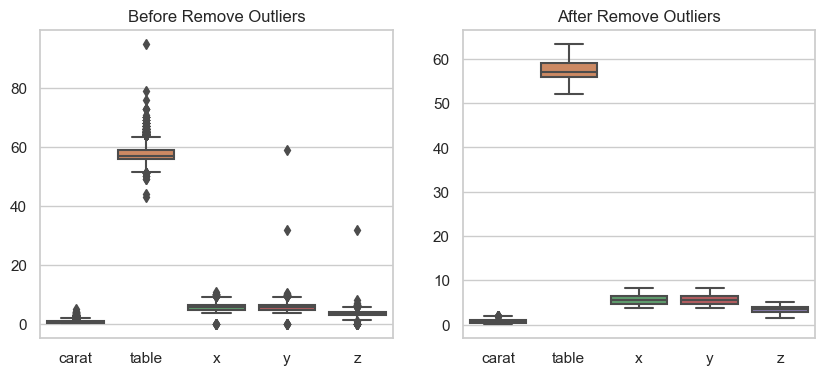

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# before scaling
ax1.set_title('Before Remove Outliers')
sns.boxplot(data=data.drop("price",axis=1),ax=ax1)

# after scaling
ax2.set_title('After Remove Outliers')
sns.boxplot(data=data_copy2.drop("price",axis=1),ax=ax2)
plt.show()

### 2.Capping

In [53]:
data_copy3=data.copy()

In [54]:
data_copy3['carat'] = np.where(
    data_copy3['carat'] > upper_limit_c,
    upper_limit_c,
    np.where(
        data_copy3['carat'] < lower_limit_c,
        lower_limit_c,
        data_copy3['carat']
    )
)

data_copy3['table'] = np.where(
    data_copy3['table'] > upper_limit_t,
    upper_limit_t,
    np.where(
        data_copy3['table'] < lower_limit_t,
        lower_limit_t,
        data_copy3['table']
    )
)

data_copy3['x'] = np.where(
    data_copy3['x'] > upper_limit_x,
    upper_limit_x,
    np.where(
        data_copy3['x'] < lower_limit_x,
        lower_limit_x,
        data_copy3['x']
    )
)

data_copy3['y'] = np.where(
    data_copy3['y'] > upper_limit_y,
    upper_limit_y,
    np.where(
        data_copy3['y'] < lower_limit_y,
        lower_limit_y,
        data_copy3['y']
    )
)

data_copy3['z'] = np.where(
    data_copy3['z'] > upper_limit_z,
    upper_limit_z,
    np.where(
        data_copy3['z'] < lower_limit_z,
        lower_limit_z,
        data_copy3['z']
    )
)

In this line, the values in the 'carat' column are checked against the upper limit and the lower limit. If a value is greater than the upper limit, it is replaced with the upper limit value. If it is lower than the lower limit, it is replaced with the lower limit value. Otherwise, the original value is kept.

This process is repeated for the columns 'table', 'x', 'y', and 'z' using similar code blocks.

**The purpose of this code is to ensure that any values in these columns that fall outside the specified limits are capped to those limits, effectively removing outliers from the dataset.**

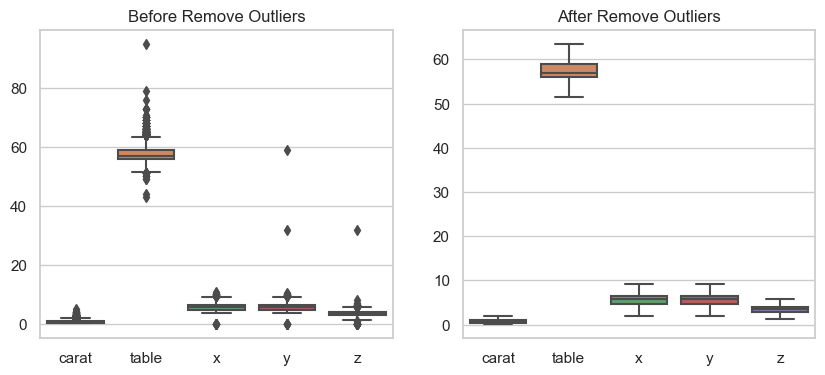

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# before scaling
ax1.set_title('Before Remove Outliers')
sns.boxplot(data=data.drop("price",axis=1),ax=ax1)

# after scaling
ax2.set_title('After Remove Outliers')
sns.boxplot(data=data_copy3.drop("price",axis=1),ax=ax2)
plt.show()

In [56]:
print(data.shape)
print(data_copy1.shape)
print(data_copy2.shape)
print(data_copy3.shape)

(53940, 9)
(53940, 9)
(51209, 9)
(53940, 9)


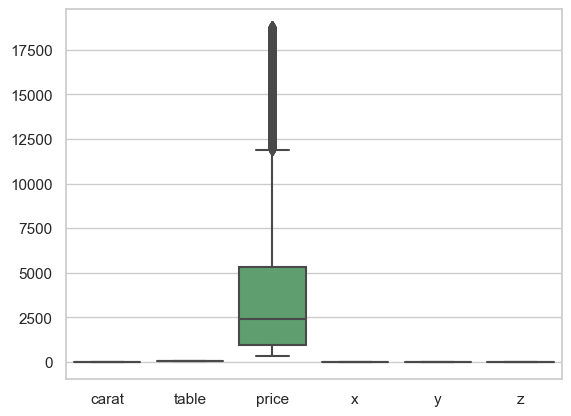

In [57]:
sns.boxplot(data=data_copy3)
plt.show()

# 3.Outlier-Removal-Using-Percentile

In [58]:
# there are two method of removal outliers in percentile method

### 1.Trimming

In [59]:
data_copy4=data.copy()

In [60]:
upper_limit_c = data_copy4['carat'].quantile(0.99)
lower_limit_c = data_copy4['carat'].quantile(0.01)

upper_limit_t = data_copy4['table'].quantile(0.99)
lower_limit_t = data_copy4['table'].quantile(0.01)

upper_limit_x = data_copy4['x'].quantile(0.99)
lower_limit_x = data_copy4['x'].quantile(0.01)

upper_limit_y = data_copy4['y'].quantile(0.99)
lower_limit_y = data_copy4['y'].quantile(0.01)

upper_limit_z = data_copy4['z'].quantile(0.99)
lower_limit_z = data_copy4['z'].quantile(0.01)

In [61]:
print("upper_limit_c",upper_limit_c)
print("lower_limit_c",lower_limit_c)

print("\n\nupper_limit_t",upper_limit_t)
print("lower_limit_t",lower_limit_t)

print("\n\nupper_limit_x",upper_limit_x)
print("lower_limit_x",lower_limit_x)

print("\n\nupper_limit_y",upper_limit_y)
print("lower_limit_y",lower_limit_y)

print("\n\nupper_limit_z",upper_limit_z)
print("lower_limit_z",lower_limit_z)

upper_limit_c 2.18
lower_limit_c 0.24


upper_limit_t 64.0
lower_limit_t 53.0


upper_limit_x 8.36
lower_limit_x 4.02


upper_limit_y 8.34
lower_limit_y 4.04


upper_limit_z 5.15
lower_limit_z 2.48


In [62]:
data_copy4=data_copy4[(data_copy4['carat']<=2.18) &(data_copy4['carat']>=0.24)]
data_copy4=data_copy4[(data_copy4['table']<=64.0) &(data_copy4['table']>=53.0)]
data_copy4=data_copy4[(data_copy4['x']<=8.36) &(data_copy4['x']>=4.02)]
data_copy4=data_copy4[(data_copy4['y']<=8.34) &(data_copy4['y']>=4.04)]
data_copy4=data_copy4[(data_copy4['z']<=5.15) &(data_copy4['z']>=2.48)]


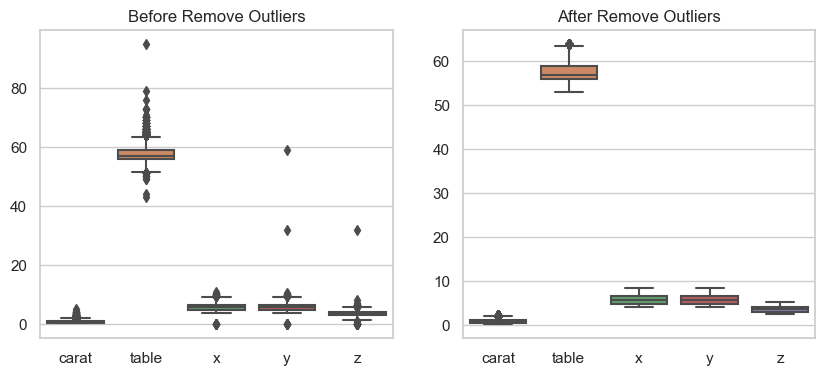

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# before scaling
ax1.set_title('Before Remove Outliers')
sns.boxplot(data=data.drop("price",axis=1),ax=ax1)

# after scaling
ax2.set_title('After Remove Outliers')
sns.boxplot(data=data_copy4.drop("price",axis=1),ax=ax2)
plt.show()

### 2.Capping

In [64]:
data_copy5=data.copy()

In [65]:
# Capping --> Winsorization
data_copy5['carat'] = np.where(data_copy5['carat'] >= upper_limit_c,
        upper_limit_c,
        np.where(data_copy5['carat'] <= lower_limit_c,
        lower_limit_c,
        data_copy5['carat']))

data_copy5['table'] = np.where(data_copy5['table'] >= upper_limit_t,
        upper_limit_t,
        np.where(data_copy5['table'] <= lower_limit_t,
        lower_limit_t,
        data_copy5['table']))

data_copy5['x'] = np.where(data_copy5['x'] >= upper_limit_x,
        upper_limit_x,
        np.where(data_copy5['x'] <= lower_limit_x,
        lower_limit_x,
        data_copy5['x']))

data_copy5['y'] = np.where(data_copy5['y'] >= upper_limit_y,
        upper_limit_y,
        np.where(data_copy5['y'] <= lower_limit_y,
        lower_limit_y,
        data_copy5['y']))

data_copy5['z'] = np.where(data_copy5['z'] >= upper_limit_z,
        upper_limit_z,
        np.where(data_copy5['z'] <= lower_limit_z,
        lower_limit_z,
        data_copy5['z']))

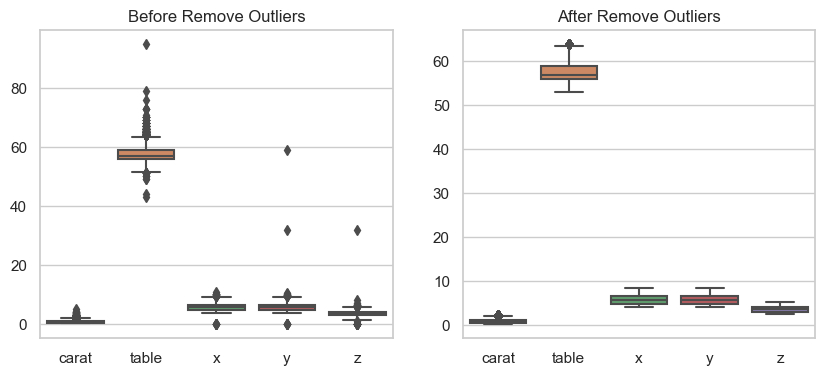

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# before scaling
ax1.set_title('Before Remove Outliers')
sns.boxplot(data=data.drop("price",axis=1),ax=ax1)

# after scaling
ax2.set_title('After Remove Outliers')
sns.boxplot(data=data_copy5.drop("price",axis=1),ax=ax2)
plt.show()

In [67]:
# print("\n\n",data.skew())
# print("\n\n1",data_copy1.skew())
# print("\n\n2",data_copy2.skew())
# print("\n\n3",data_copy3.skew())
# print("\n\n4",data_copy4.skew())
# print("\n\n5",data_copy5.skew())

In [68]:
skew_compare_df={"Original data":data.skew(),"Z-Score Trim":data_copy.skew(),"Z-Score Cap":data_copy1.skew(),"IQR-Trim":data_copy2.skew()
             ,"IQR-Cap":data_copy3.skew(),"Percentile Trim":data_copy4.skew(),"Percentile Cap":data_copy5.skew()}
skew_compare_df=pd.DataFrame(skew_compare_df)
skew_compare_df.drop(['price'],axis=0,inplace=True)

The code in the focal cell is creating a DataFrame called skew_compare_df that compares the skewness of different datasets. Skewness is a measure of the asymmetry of a distribution.

The code calculates the skewness for various datasets, including the original data and different variations of the data with different outlier handling techniques applied. These techniques include Z-Score Trim, Z-Score Cap, IQR-Trim, IQR-Cap, Percentile Trim, and Percentile Cap.

The code then creates a DataFrame called skew_compare_df using the calculated skewness values. The DataFrame has the skewness values for each dataset as columns.

Finally, the code drops the 'price' column from the DataFrame skew_compare_df using the drop() function with the axis=0 parameter, which means dropping rows.

The code doesn't print or display anything to the console or generate any visible output. The commented lines at the beginning of the code suggest that there may have been some code that was previously commented out, but in the given code, there is no actual output or result generated.

In [69]:
skew_compare_df

,Original data,Z-Score Trim,Z-Score Cap,IQR-Trim,IQR-Cap,Percentile Trim,Percentile Cap
carat,1.116646,0.932485,0.992269,0.657810,0.899893,0.893537,0.981392
table,0.796896,0.443530,0.525619,0.385319,0.473306,0.465529,0.530483
x,0.378676,0.340047,0.388737,0.220066,0.389029,0.324750,0.368908
y,2.434167,0.336729,0.385505,0.217381,0.385351,0.320758,0.365417
z,1.522423,0.331250,0.298359,0.211280,0.374472,0.318929,0.360665


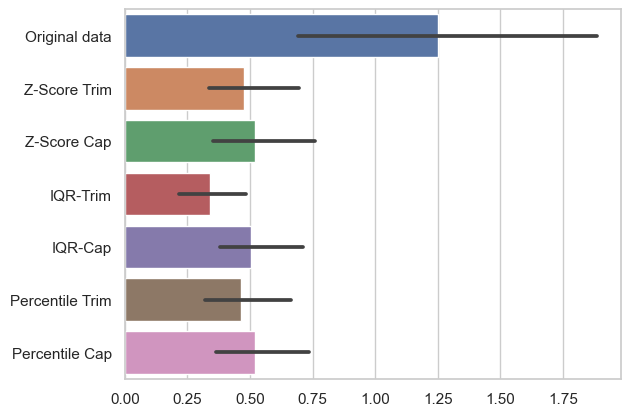

In [70]:
sns.barplot(data=skew_compare_df,orient="h")
plt.show()

- The above Graph clearly show that the IQR-Trim has a very low skew it's mean very low outliers so i use iqr-trim for my model train

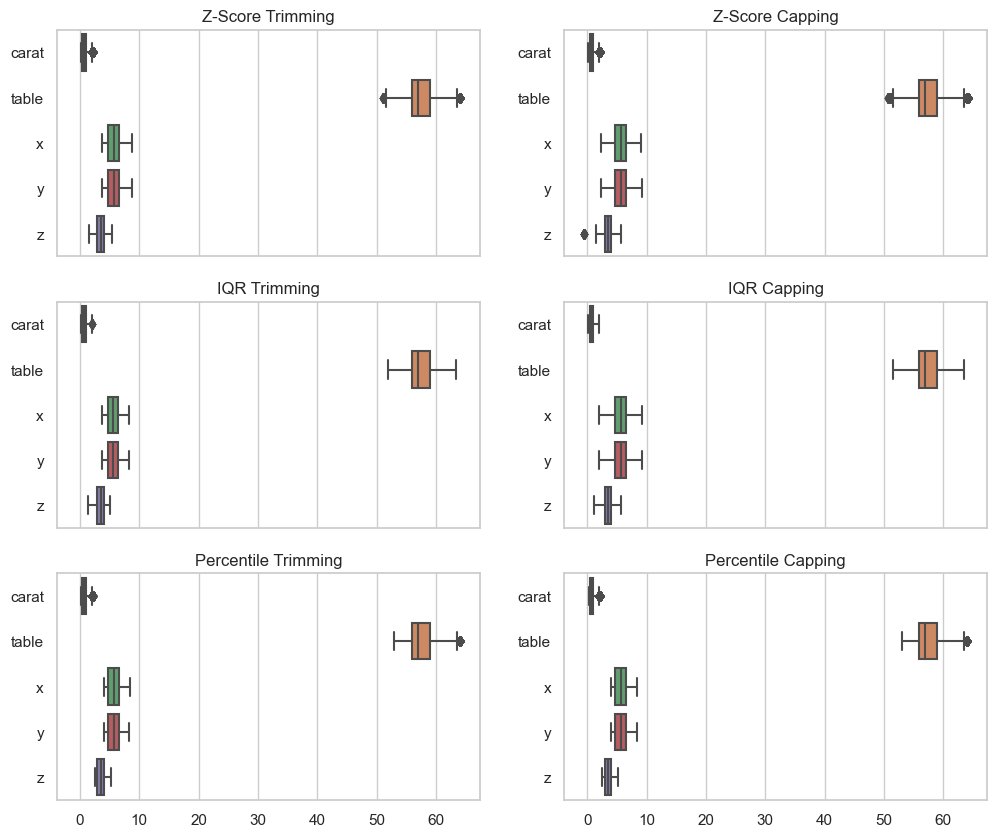

In [71]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2 ,sharex=True, figsize=(12,10))

ax1.set_title('Z-Score Trimming')
sns.boxplot(data=data_copy.drop("price",axis=1),ax=ax1,orient="h")

ax2.set_title('Z-Score Capping')
sns.boxplot(data=data_copy1.drop("price",axis=1),ax=ax2,orient="h")

ax3.set_title('IQR Trimming')
sns.boxplot(data=data_copy2.drop("price",axis=1),ax=ax3,orient="h")

ax4.set_title('IQR Capping')
sns.boxplot(data=data_copy3.drop("price",axis=1),ax=ax4,orient="h")

ax5.set_title('Percentile Trimming')
sns.boxplot(data=data_copy4.drop("price",axis=1),ax=ax5,orient="h")

ax6.set_title('Percentile Capping')
sns.boxplot(data=data_copy5.drop("price",axis=1),ax=ax6,orient="h")
plt.show()

- we can clearly see that in tha above graph in 2nd row in 2nd column IQR-Capping all the outliers are remove

## Encoding

In [72]:
## OneHotEncoder

The OneHotEncoder is a commonly used technique for categorical variable encoding in machine learning. It transforms categorical features into binary vectors, where each category is represented by a binary column. However, without the actual code, it is not possible to provide further details or explanations specific to its implementation.

In [73]:
data_copy3.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,63.5,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


In [74]:
# Xe=data_copy3.drop(["carat","table","price","x","y","z"],axis=1)
# ye=data_copy3[["carat","table","price","x","y","z"]]

In [75]:
# x_train_e,x_test_e,y_train_e,y_test_e=train_test_split(Xe,ye,test_size=.35,random_state=0)

In [76]:
ohe=OneHotEncoder(sparse=False,dtype=np.int32)

 line initializes an instance of the OneHotEncoder class from the scikit-learn library. The OneHotEncoder is used for converting categorical features into numerical ones by creating binary columns for each category. The parameters sparse=False and dtype=np.int32 are specified for the encoder. This means that the encoded output will be a dense array (not sparse) and the data type of the encoded features will be int32.

In [77]:
x_train_ohe=ohe.fit_transform(data_copy3[['cut','color','clarity']])

The code snippet in the focal cell is performing one-hot encoding on the categorical columns 'cut', 'color', and 'clarity' of the DataFrame data_copy3. One-hot encoding is a technique used to convert categorical data into a numerical representation that can be used for machine learning algorithms.

In [78]:
# x_test_ohe=ohe.transform(x_test_e[['cut','color','clarity']])

In [79]:
# print(x_train_e.shape)
# print(x_train_ohe.shape)
# print(ohe.categories_)

In [80]:
x_train_ohe

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [81]:
feature_labels=ohe.categories_
np.array(feature_labels).ravel()

array([array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
       array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
       array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
             dtype=object)                                            ],
      dtype=object)

This output is a NumPy array containing three arrays. Each of these arrays represents the categories for the corresponding categorical feature. For example, the first array represents the categories for the "cut" feature, the second array represents the categories for the "color" feature, and the third array represents the categories for the "clarity" feature.

In [82]:
new_data=pd.DataFrame(x_train_ohe,columns=['Fair', 'Good', 'Ideal', 'Premium', 'Very Good','D', 'E', 'F', 'G', 'H', 'I', 'J',
                                'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'          ])
new_data

,Fair,Good,Ideal,Premium,Very Good,D,E,F,G,H,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


The code in the FOCAL CELL is creating a new DataFrame called new_data using the x_train_ohe array. The x_train_ohe array is the result of applying one-hot encoding to the categorical columns "cut," "color," and "clarity" in the data_copy3 DataFrame.

In [83]:
new_data=pd.concat([data_copy3,new_data],axis=1,copy=False)
new_data

,carat,cut,color,clarity,table,price,x,y,z,Fair,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,63.5,327,4.05,4.07,2.31,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,2757,5.75,5.76,3.50,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,Good,D,SI1,55.0,2757,5.69,5.75,3.61,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,Very Good,D,SI1,60.0,2757,5.66,5.68,3.56,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,Premium,H,SI2,58.0,2757,6.15,6.12,3.74,0,...,0,0,0,0,0,1,0,0,0,0


In the previous code, there are various operations performed on the data before the focal cell. The code prepares the data by encoding categorical columns using OneHotEncoder and concatenating the encoded columns with the original data. Finally, the prepared data is stored in the variable Prepared_data.

In [84]:
Prepared_data=new_data.copy()
# Prepared_data

The code in the focal cell is quite simple. It copies the contents of the new_data DataFrame into a new DataFrame called Prepared_data. The purpose of this line is to create a separate copy of the data that has been prepared in the previous code.

In [86]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# # before scaling
# ax1.set_title('Before Remove Outliers')
# sns.boxplot(data=new.drop("price",axis=1),ax=ax1,orient="h")

# # after scaling
# ax2.set_title('After Remove Outliers')
# sns.boxplot(data=new_df1.drop("price",axis=1),ax=ax2,orient="h")
# plt.show()

### Train Test split of Prepared Data

In [87]:
XP=Prepared_data.drop("price",axis=1)
yp=Prepared_data['price']
print("XP shape",XP.shape)
print("yp shape",yp.shape)

XP shape (53940, 25)
yp shape (53940,)


In this FOCAL CELL, the code performs the following actions:

It includes some commented out code that is not currently being executed, so we can skip over those lines.

The code creates an instance of the OneHotEncoder class from scikit-learn and assigns it to the variable ohe. The encoder is configured to output non-sparse arrays of 32-bit integers.

The code applies one-hot encoding to the 'cut', 'color', and 'clarity' columns of the data_copy3 DataFrame by calling the fit_transform method of the ohe encoder. The resulting encoded array is stored in the variable x_train_ohe.

The variable feature_labels is assigned the categories (labels) of the one-hot encoded features.

The code creates a new DataFrame called new_data by concatenating the original data_copy3 DataFrame and the x_train_ohe array along the column axis. The resulting DataFrame has additional columns representing the one-hot encoded features.

The Prepared_data DataFrame is created as a copy of new_data.

The 'cut', 'color', and 'clarity' columns are dropped from the Prepared_data DataFrame, resulting in a DataFrame that only contains the original features along with the additional one-hot encoded columns.

The code includes some commented out lines related to plotting using Matplotlib and Seaborn libraries.

Finally, the code creates two variables XP and yp. XP is assigned the Prepared_data DataFrame without the 'price' column, and yp is assigned the 'price' column of Prepared_data. The code then prints the shapes of XP and yp to the console.

Based on the printed output, XP has a shape of (53940, 25), indicating it has 53,940 rows and 25 columns. yp has a shape of (53940,), indicating it has 53,940 elements representing the prices.

In [88]:
X_train,X_test,Y_train,Y_test=train_test_split(XP,yp, test_size= .5,random_state=123)
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("Y_train shape",Y_train.shape)
print("Y_test shape",Y_test.shape)

X_train shape (26970, 25)
X_test shape (26970, 25)
Y_train shape (26970,)
Y_test shape (26970,)


The code in the FOCAL CELL is performing a train-test split on the data. It uses the train_test_split function from the sklearn.model_selection module.

The train_test_split function takes two main arguments: XP and yp. XP is a DataFrame containing the features (independent variables) of the data, and yp is a Series containing the target variable (dependent variable).

The function splits the data into two sets: X_train and X_test for the features, and Y_train and Y_test for the target variable. The split is performed with a test size of 0.5 (50% of the data) specified by the test_size parameter. The random seed is set to 123 using the random_state parameter.

After the train-test split, the code prints the shapes of the resulting arrays:

X_train has a shape of (26970, 25), indicating that it contains 26970 rows and 25 columns.
X_test has the same shape as X_train, which is (26970, 25).
Y_train is a 1-dimensional array with a shape of (26970,).
Y_test is also a 1-dimensional array with a shape of (26970,).
This means that the data has been successfully split into training and testing sets, where the training set contains 26970 samples and the testing set contains the same number of samples.

Note that the code does not perform any further actions or computations after printing the shapes of the arrays. The result of the focal cell is an empty output.

In [94]:
LR=LinearRegression()

LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In the focal cell, the code is performing linear regression using the LinearRegression class from scikit-learn library. Here is a breakdown of the code:

LR = LinearRegression(): This line creates an instance of the LinearRegression class and assigns it to the variable LR. The LinearRegression class is a linear regression model implementation provided by the scikit-learn library.

LR.fit(x_train, y_train): This line fits the linear regression model to the training data. The fit method takes two arguments: x_train, which represents the input features or independent variables, and y_train, which represents the target variable or dependent variable. The model learns the relationship between the input features and the target variable based on the training data.

y_pred = LR.predict(x_test): This line uses the trained linear regression model to make predictions on the test data. The predict method takes x_test as the input and returns the predicted values for the target variable. The predicted values are assigned to the variable y_pred.

The code doesn't print or return any output, so there is no STDOUT or result from this specific code. It seems like the code snippet is part of a larger code that may include further steps and calculations.

In [97]:
print("Mean Absolute Error (MAE)",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE)",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

Mean Absolute Error (MAE) 3.127634563929979e-12
Mean Squared Error (MSE) 1.555157774008846e-23
R2 score 1.0


The code in the focal cell is responsible for printing out the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R2 score. These are common metrics used to evaluate the performance of a regression model.
The STDOUT you provided shows the results of these calculations. The MAE is 3.127634563929979e-12, the MSE is 1.555157774008846e-23, and the R2 score is 1.0. **These values indicate that the model's predictions are very close to the true values, with very low error.**

## Comparing Actual value Vs Predict Value

In [98]:
## y_test or y_pred convert into dataset
comparing=pd.DataFrame({"Actual":y_test,"Prediction":y_pred})
comparing.sample(10)

,Actual,Prediction
40841,1173,1173.0
38169,1014,1014.0
29414,700,700.0
8915,4494,4494.0
16781,6685,6685.0
8077,4338,4338.0
21936,10011,10011.0
23330,11376,11376.0
39618,491,491.0
51823,2420,2420.0


In [99]:
## here we can see the accuracy of the prediciton 
comparing.describe().round(1)

,Actual,Prediction
count,18879.0,18879.0
mean,3909.0,3909.0
std,3977.8,3977.8
min,326.0,326.0
25%,942.0,942.0
50%,2400.0,2400.0
75%,5260.0,5260.0
max,18788.0,18788.0


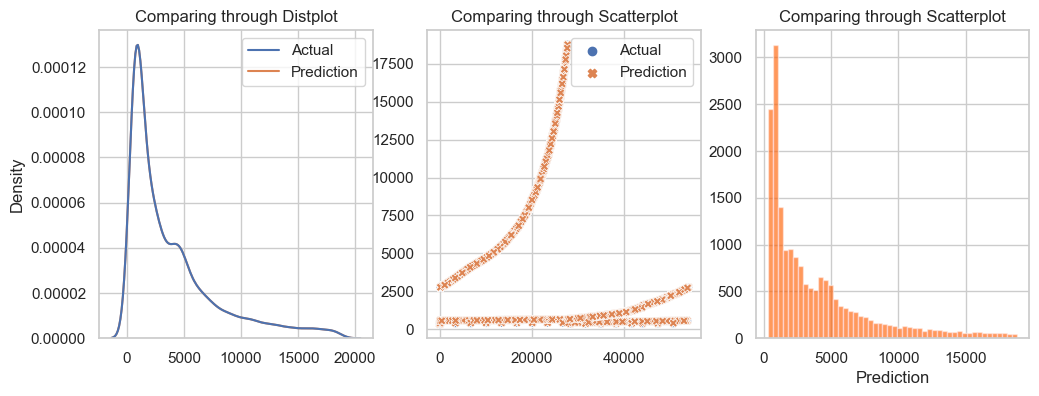

In [100]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(12,4))

ax1.set_title("Comparing through Distplot")
sns.kdeplot(data=comparing,ax=ax1)

ax2.set_title("Comparing through Scatterplot")
sns.scatterplot(data=comparing,ax=ax2)

ax3.set_title("Comparing through Scatterplot")
sns.distplot(comparing['Actual'], color='yellow',kde=False,bins=50,ax=ax3)
sns.distplot(comparing['Prediction'],color='red',kde=False,bins=50,ax=ax3)
plt.show()

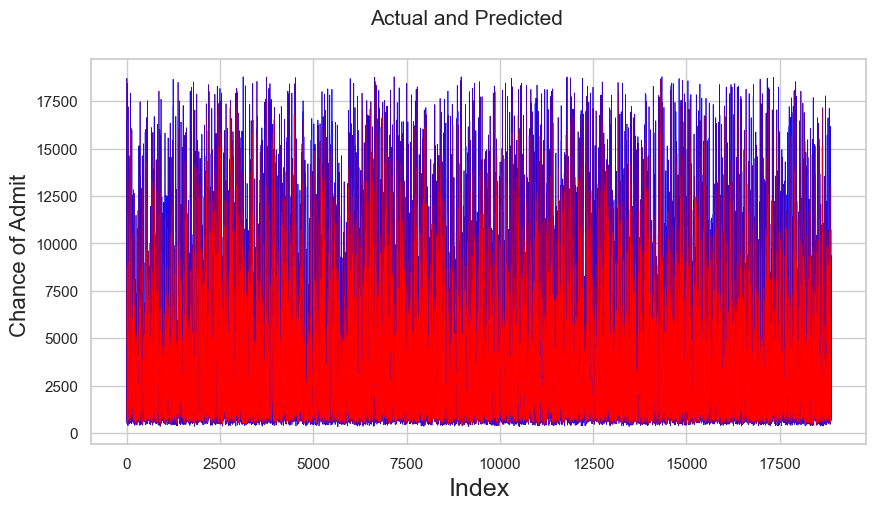

In [109]:
# Actual and Predicted
c = [i for i in range(18879)] # generating index 
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_test, color="blue", linewidth=0.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=0.1, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Chance of Admit ', fontsize=16) 
plt.legend
plt.show()